In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from frbpoppy import unpickle, merge_pop

In [2]:
for model in ['pl', 'sfr', 'delay_0.1gyr', 'delay_0.5gyr', 'delay_1gyr']:
    for i in range(50):
        exec("surv_pop_%s_%s=unpickle('mcmc/surveyed_' + model + '_' + str(i))"%(model.replace('.', ''),i))
for model in ['pl', 'sfr', 'delay_01gyr', 'delay_05gyr', 'delay_1gyr']:
    exec("surv_pop_%s=merge_pop(*[eval('surv_pop_' + model + '_' + str(i)) for i in range(50)])"%model)

In [3]:
pop_pl = unpickle('mcmc/pl_zmax2.5')
pop_sfr = unpickle('mcmc/sfr_zmax2.5')
pop_d01 = unpickle('mcmc/delay_0.1gyr_zmax2.5')
pop_d05 = unpickle('mcmc/delay_0.5gyr_zmax2.5')
pop_d1 = unpickle('mcmc/delay_1gyr_zmax2.5')

## mean redshift

In [7]:
np.mean(surv_pop_pl.frbs.z), np.mean(surv_pop_sfr.frbs.z), np.mean(surv_pop_delay_01gyr.frbs.z),\
np.mean(surv_pop_delay_05gyr.frbs.z), np.mean(surv_pop_delay_1gyr.frbs.z)

(0.19062473, 0.23857822, 0.2023097, 0.21273795, 0.20003144)

## median DM

In [8]:
np.median(surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z))-40, \
np.median(surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z))-40, \
np.median(surv_pop_delay_01gyr.frbs.dm_host*(1+surv_pop_delay_01gyr.frbs.z))-40, \
np.median(surv_pop_delay_05gyr.frbs.dm_host*(1+surv_pop_delay_05gyr.frbs.z))-40, \
np.median(surv_pop_delay_1gyr.frbs.dm_host*(1+surv_pop_delay_1gyr.frbs.z))-40

(330.73468017578125,
 279.0299377441406,
 303.77752685546875,
 299.2991027832031,
 297.3316650390625)

# Fig.8

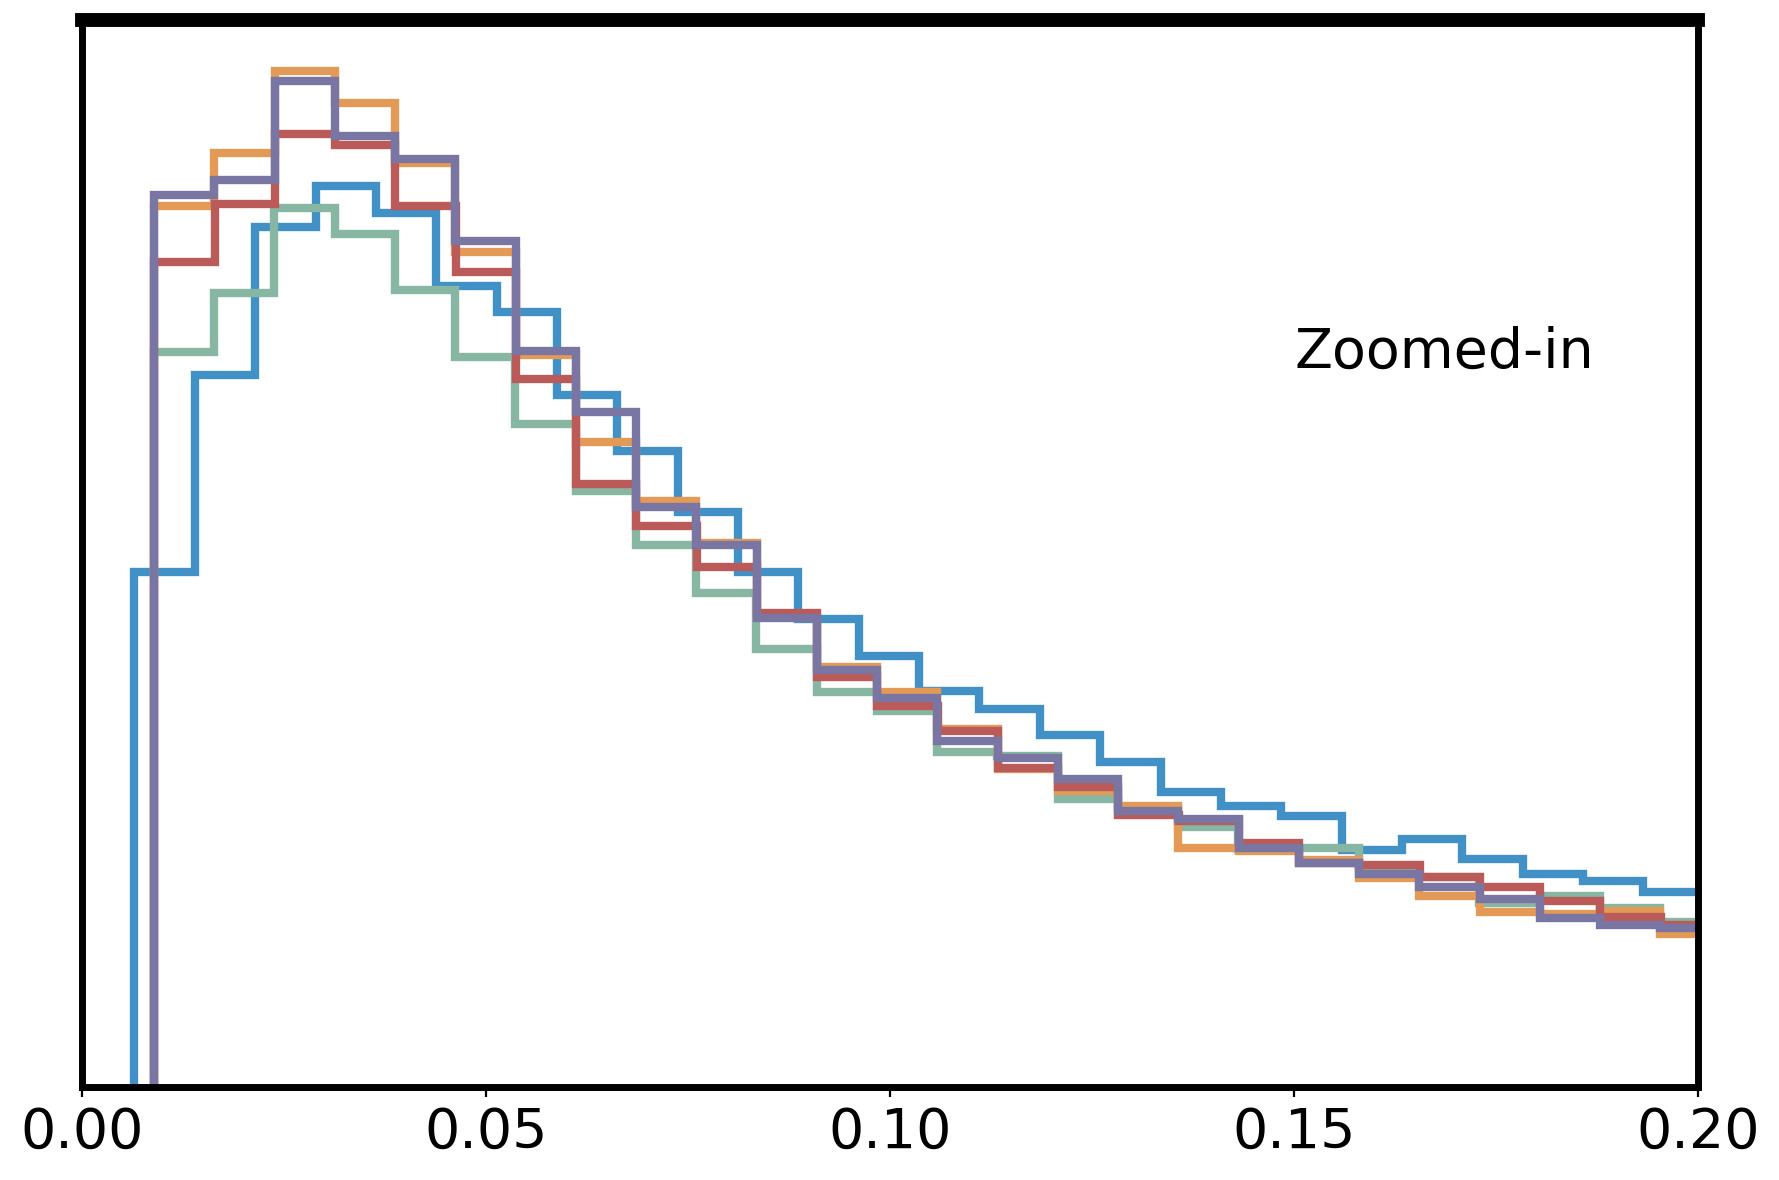

In [66]:
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(111)
df1 = pd.DataFrame(data=surv_pop_pl.frbs.z, columns=['pl'])
df2 = pd.DataFrame(data=surv_pop_sfr.frbs.z, columns=['sfr'])
df3 = pd.DataFrame(data=surv_pop_delay_01gyr.frbs.z, columns=['dsfr01'])
df4 = pd.DataFrame(data=surv_pop_delay_05gyr.frbs.z, columns=['dsfr05'])
df5 = pd.DataFrame(data=surv_pop_delay_1gyr.frbs.z, columns=['dsfr1'])

ax1 = df1['pl'].plot.hist(bins=200, density=True, histtype='step', linewidth=3, alpha=1, label='<z>=0.19', color='#4191C7')
ax2 = df2['sfr'].plot.hist(bins=200, density=True, histtype='step', linewidth=3, alpha=1, color='#87B6A2')
ax3 = df3['dsfr01'].plot.hist(bins=200, density=True, histtype='step', linewidth=3, alpha=1, color='#E39A56')
ax4 = df4['dsfr05'].plot.hist(bins=200, density=True, histtype='step', linewidth=3, alpha=1, color='#BA5B59')
ax5 = df5['dsfr1'].plot.hist(bins=200, density=True, histtype='step', linewidth=3, alpha=1, color='#7976A3')

for axis in ['top']:
    ax.spines[axis].set_linewidth(5)
for axis in ['bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlim(0.0, 0.2)
plt.ylabel('')
plt.xticks([0.0, 0.05, 0.10, 0.15, 0.20], fontsize=20)
plt.yticks([])
#plt.legend()
plt.text(0.15, 5.5, 'Zoomed-in', fontsize=20)
plt.tight_layout()
plt.savefig('number_density_observed_zoom_in.pdf', transparent=True, bbox_inches='tight')
plt.savefig('number_density_observed_zoom_in.jpg', transparent=True, bbox_inches='tight', pad_inches=0)

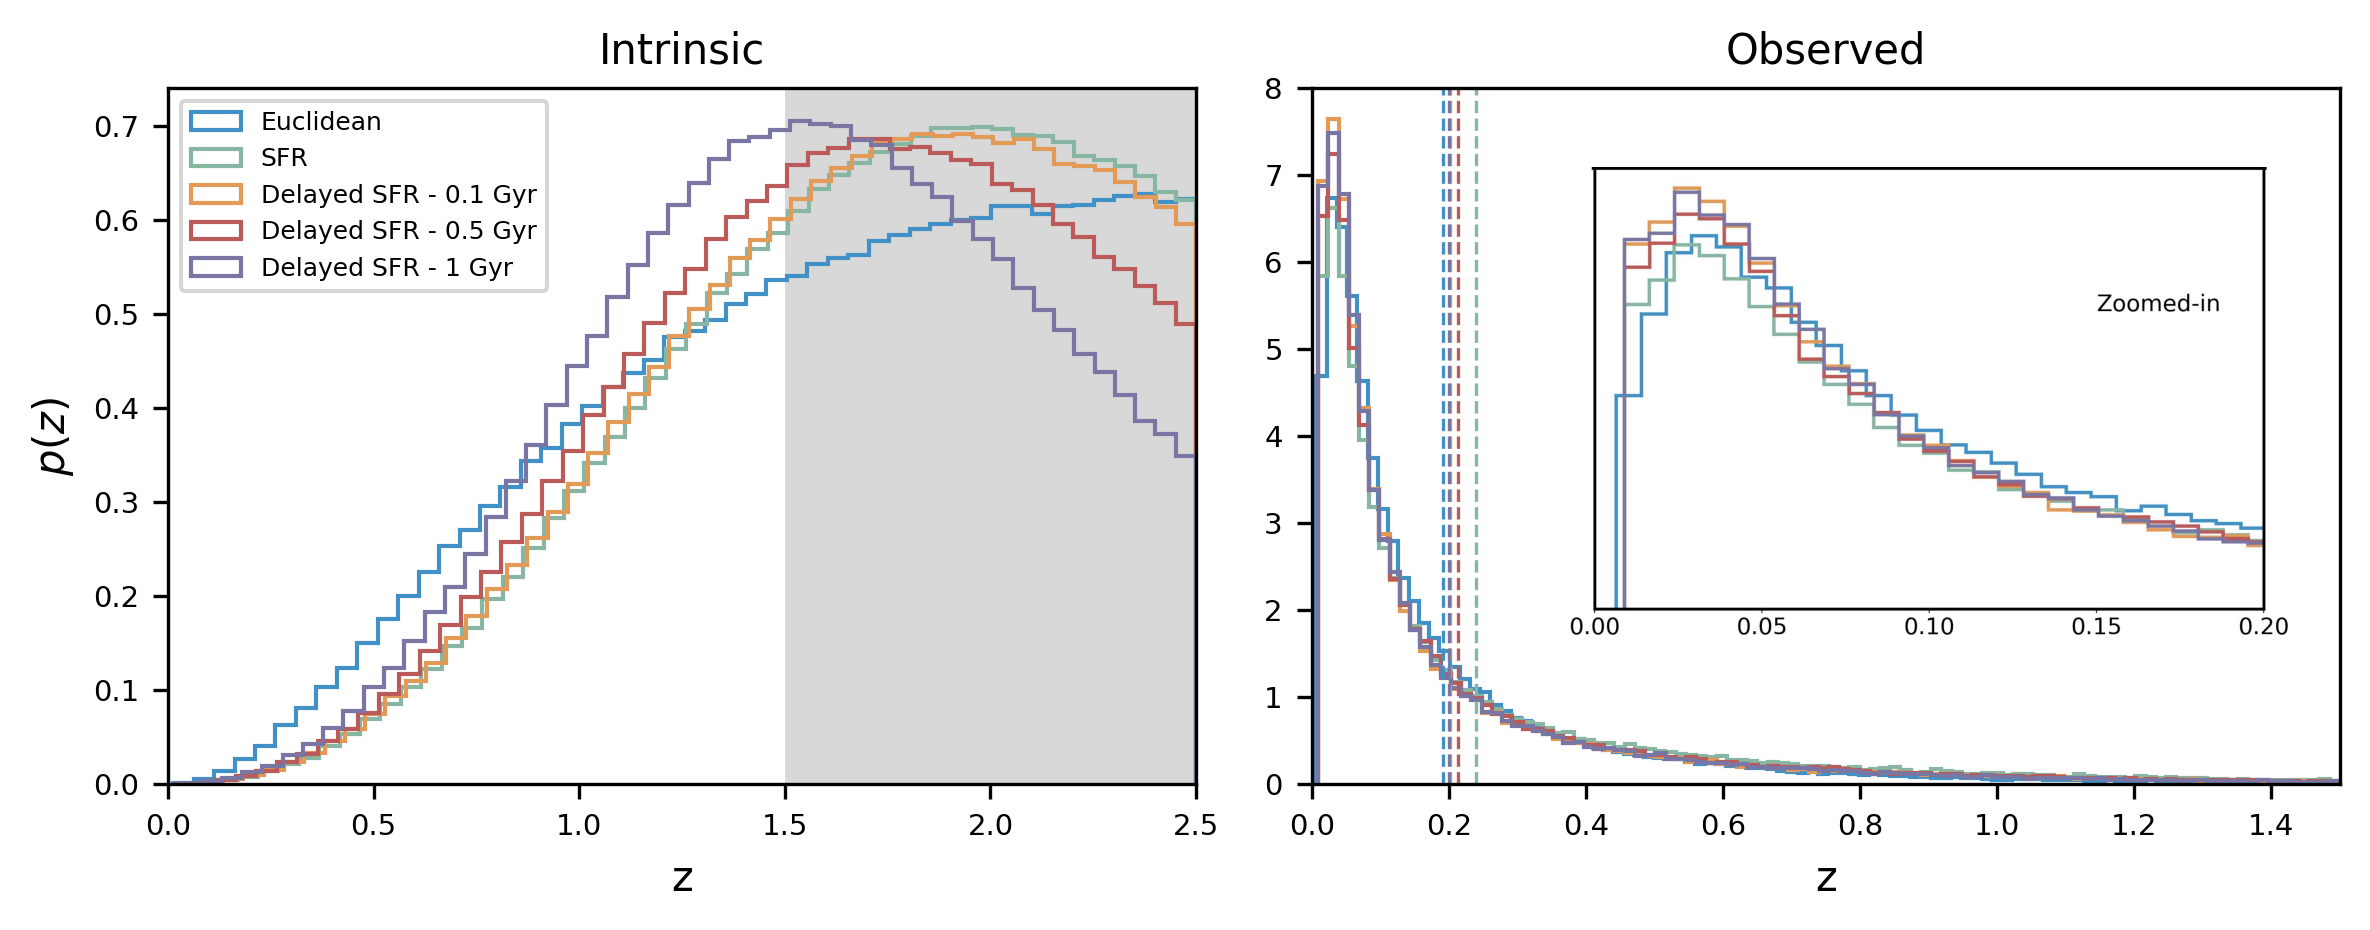

In [69]:
fig = plt.figure(figsize=(8,3.2), dpi=300)

ax1 = plt.subplot2grid((1,2),(0,0), rowspan=1)
'''
ax1.hist(pop_pl.frbs.z, density=True, bins=50, alpha=0.3, label='PL')
ax1.hist(pop_sfr.frbs.z, density=True, bins=50, alpha=0.3, label='SFR')
ax1.hist(pop_d01.frbs.z, density=True, bins=50, alpha=0.3, label='Delayed SFR - 0.1 Gyr')
ax1.hist(pop_d05.frbs.z, density=True, bins=50, alpha=0.3, label='Delayed SFR - 0.5 Gyr')
ax1.hist(pop_d1.frbs.z, density=True, bins=50, alpha=0.3, label='Delayed SFR - 1 Gyr')
'''
ax1.hist(pop_pl.frbs.z, density=True, bins=50, alpha=1, label='Euclidean', color='#4191C7', histtype='step')
ax1.hist(pop_sfr.frbs.z, density=True, bins=50, alpha=1, label='SFR', color='#87B6A2', histtype='step')#4B5F66
ax1.hist(pop_d01.frbs.z, density=True, bins=50, alpha=1, label='Delayed SFR - 0.1 Gyr', color='#E39A56', histtype='step')
ax1.hist(pop_d05.frbs.z, density=True, bins=50, alpha=1, label='Delayed SFR - 0.5 Gyr', color='#BA5B59', histtype='step')
ax1.hist(pop_d1.frbs.z, density=True, bins=50, alpha=1, label='Delayed SFR - 1 Gyr', color='#7976A3', histtype='step')
ax1.set_xlabel('z')
ax1.set_ylabel('$p(z)$')
ax1.tick_params(labelsize=7)

#ax1.fill_between(1.5, 2.5, 1, facecolor='grey', alpha=0.7)
ax1.axvspan(1.5, 2.5, facecolor='grey', alpha=0.3)#hatch='x', color='grey'
ax1.set_xlim(0, 2.5)
ax1.legend(fontsize=6)
ax1.set_title('Intrinsic', fontsize=10)

ax2 = plt.subplot2grid((1,2),(0,1), rowspan=1)


ax2.hist(surv_pop_pl.frbs.z, density=True, bins=100, alpha=1.0, label='Euclidean', color='#4191C7', histtype='step')
ax2.hist(surv_pop_sfr.frbs.z, density=True, bins=100, alpha=1.0, label='SFR', color='#87B6A2', histtype='step')
ax2.hist(surv_pop_delay_01gyr.frbs.z, density=True, bins=100, alpha=1.0, label='Delayed SFR - 0.1 Gyr', color='#E39A56', histtype='step')
ax2.hist(surv_pop_delay_05gyr.frbs.z, density=True, bins=100, alpha=1.0, label='Delayed SFR - 0.5 Gyr', color='#BA5B59', histtype='step')
ax2.hist(surv_pop_delay_1gyr.frbs.z, density=True, bins=100, alpha=1.0, label='Delayed SFR - 1 Gyr', color='#7976A3', histtype='step')

im = plt.imread('number_density_observed_zoom_in.jpg')
axins = ax2.inset_axes([0.25, 0.20, 0.70, 0.70])
axins.imshow(im[:1130, :])
axins.axis('off')
# sub region of the original image


ax2.vlines(np.round(np.mean(surv_pop_pl.frbs.z),3), 0, 8, color='#4191C7', linestyle='dashed', linewidth=0.8)
ax2.vlines(np.round(np.mean(surv_pop_sfr.frbs.z),3), 0, 8, color='#87B6A2', linestyle='dashed', linewidth=0.8)
ax2.vlines(np.round(np.mean(surv_pop_delay_01gyr.frbs.z),3), 0, 8, color='#E39A56', linestyle='dashed', linewidth=0.8)
ax2.vlines(np.round(np.mean(surv_pop_delay_05gyr.frbs.z),3), 0, 8, color='#BA5B59', linestyle='dashed', linewidth=0.8)
ax2.vlines(np.round(np.mean(surv_pop_delay_1gyr.frbs.z),3), 0, 8, color='#7976A3', linestyle='dashed', linewidth=0.8)


ax2.set_xlabel('z')
ax2.tick_params(labelsize=7)
ax2.set_xlim(0, 1.5)
ax2.set_ylim(0, 8)
ax2.set_title('Observed', fontsize=10)

plt.tight_layout()
plt.savefig('number_density_models.pdf', transparent=True, bbox_inches='tight')